In [1]:
from astroquery.simbad import Simbad
from astropy.io import fits
import astropy.units as u

import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from urllib.parse import quote
from urllib.parse import urlencode
import numpy as np
from astropy.visualization import (MinMaxInterval, SqrtStretch, AsinhStretch, ImageNormalize)

%matplotlib inline

In [2]:
width = 150
height = 150
fov = 0.1

objects = ['M36', 'M16', 'M20', 'M51', 'M 33', 'M 101', 'M1', 'NGC 4676', 'NGC 5614', 'M82', 'M13']
objects = ['M1', 'M82']
hips_list = ['DSS2/red', 'CDS/P/AKARI/FIS/N160', 'PanSTARRS/DR1/z', '2MASS/J', 'AllWISE/W3']
#hips_list = ['http://alasky.u-strasbg.fr/Pan-STARRS/DR1/color-y-i-g/']

nb_obj = len(objects)
nb_hips = len(hips_list)

Saving M1-DSS2_red.fits
Saving M1-CDS_P_AKARI_FIS_N160.fits
Saving M1-PanSTARRS_DR1_z.fits
Saving M1-2MASS_J.fits
Saving M1-AllWISE_W3.fits
Saving M82-DSS2_red.fits
Saving M82-CDS_P_AKARI_FIS_N160.fits
Saving M82-PanSTARRS_DR1_z.fits
Saving M82-2MASS_J.fits
Saving M82-AllWISE_W3.fits


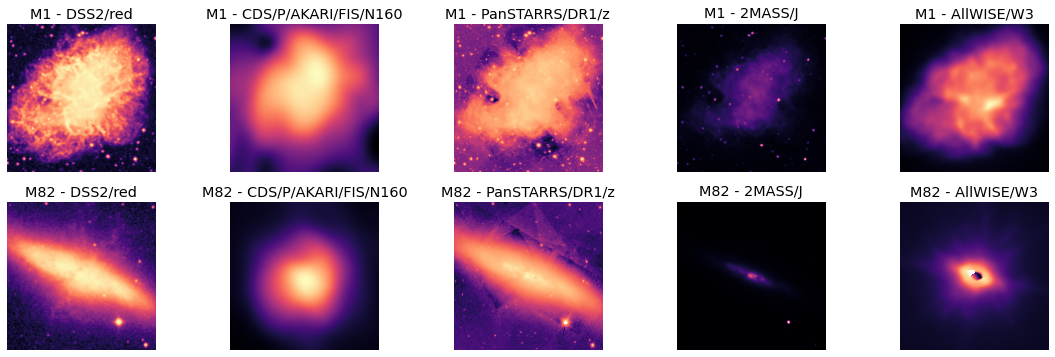

In [3]:
fig, axs = plt.subplots(nb_obj, nb_hips, figsize=(4 * nb_hips, 3* nb_obj), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.001)

axs = axs.ravel()


i = 0
for obj in objects:
    for hips in hips_list:
        axs[i].set_axis_off()

        axs[i].set_title('{} - {}'.format(obj, hips))
        sc = SkyCoord.from_name(obj)
        ra = sc.icrs.ra.deg
        dec = sc.icrs.dec.deg
        url = 'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips={}&width={}&height={}&fov={}&projection=TAN&coordsys=icrs&ra={}&dec={}'.format(quote(hips), width, height, fov, ra, dec)
    
        hdu = fits.open(url)
    
        file_name = '{}-{}.fits'.format(obj, hips.replace('/', '_'))
        hdu.writeto(file_name, overwrite=True)
        print('Saving {}'.format(file_name))
        im = hdu[0].data
        norm = ImageNormalize(im, interval=MinMaxInterval(),
                      stretch=AsinhStretch())
        axs[i].imshow(im, cmap='magma', norm=norm, origin='lower')
        
        i += 1

In [4]:
coord = SkyCoord('16 14 20.30000000 -19 06 48.1000000', unit=(u.hourangle, u.deg), frame='fk5')
query_results = Simbad.query_region(coord) 
query_results

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
[T64] 7,16 14 20.2881,-19 06 48.062,14,14,0.109,0.056,90,A,O,2018yCat.1345....0G
IRAS 16114-1858,16 14 22.1,-19 06 14,5,5,50000.000,12000.000,100,E,M,1988IRASP.C......0J
2MASS J16142091-1906051,16 14 20.9018,-19 06 05.195,14,14,0.064,0.032,90,A,O,2018yCat.1345....0G


In [5]:
object_main_id = query_results[0]['MAIN_ID']#.decode('ascii')
object_coords = SkyCoord(ra=query_results['RA'], dec=query_results['DEC'], unit=(u.hourangle, u.deg), frame='icrs')
query_params = { 
    'hips': 'DSS', 
    'object': object_main_id, 
    'ra': object_coords[0].ra.value, 
    'dec': object_coords[0].dec.value, 
    'fov': (2 * u.arcmin).to(u.deg).value, 
    'width': 500, 
    'height': 500 
}
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
hdul = fits.open(url)

In [6]:
hdul.info()

Filename: /home/jbrande/.astropy/cache/download/url/e29ae740cf6bcf2cd0c9f806a06b78b5/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (500, 500)   int16   


In [7]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                250.0 / Pixel coordinate of reference point            
CRPIX2  =                250.0 / Pixel coordinate of reference point            
CDELT1  = -6.6666668547014E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  6.6666668547014E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

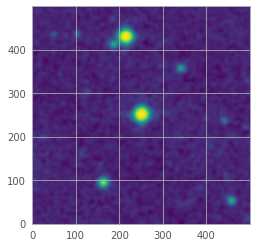

In [8]:
im = hdul[0].data
norm = ImageNormalize(im, interval=MinMaxInterval(), stretch=AsinhStretch())

fig = plt.figure()
ax=plt.gca()
ax.imshow(im, cmap='viridis', norm=norm, origin='lower')